## Final Project Submission

Please fill out:
* Student name: Jane Njuguna
* Student pace:Full time
* Scheduled project review date/time:30/09/2022 
* Instructor name: Lucille Kaleha

## Business understanding
#### Business overview
Cherie real estate agency is a housing stakeholder that gives advice to homeowners so that they can buy and/or sell home. 
#### Objectives
We want to know how renovation of the 
We help homeowners to be able to predict the current and future prices of their houses depending on the renovations done on their houses so that they can know the best time to buy or sell their houses. 

We will build a model that will help us to predict the prices. This will help them to plan on so that they can be able to plan on when to buy 
We want to give to be able to give good advise to the homeowners about  the current and future prices of the houses

We want to do analysis and create a model so that we can know how the location and the condition of the house  might increase the estimated value of their homes and by what amount. This will help us 

## Importing dependencies 

In [224]:
# importing libraries
#For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For numerical operations
import numpy as np
#For data loading, data analysis and data cleaning 
import pandas as pd
# For creating linear regression models
from sklearn.linear_model import LinearRegression
# For splitting data to testing and training data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Data loading
The data used is from kc_house_data.csv

In [225]:
# loading the data
houses_df = pd.read_csv("data/kc_house_data.csv")

## Data understanding
* Checking the shape of the dataframe
* Generate an overview of the dataframe

In [226]:
# to check the shape of the dataframe
houses_df.shape

(21597, 21)

In [227]:
# to check  information about the DataFrame
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [228]:
# checking the type of data types in the dataset
houses_df.dtypes.value_counts()

int64      9
object     6
float64    6
dtype: int64

In [229]:
#to check the columns in the dataset
houses_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [230]:
# the overview of the dataframe
houses_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [231]:
# the overview of the dataframe
houses_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [232]:
# descriptive statistics of the dataset
houses_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [233]:
#checking the unique values per column
houses_df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

### Observations
1. The data used is in the form of a csv file.
2. The dataframe has 21597 rows and 21 columns.
3. The dataframe has 6 float64,9 int64 and 6 object data types.
4. The data contains the target and predictor variables needed.

## Data preparation
#### a) Univariant analysis
   * Data cleaning:Checking missing values and duplicates
   * Dropping columns not used
   * checking for outliers

In [234]:
# To check the the null values in the dataset
missing_data_check = houses_df.isnull().sum().sort_values(ascending = False)
missing_data_check

yr_renovated     3842
waterfront       2376
view               63
id                  0
sqft_above          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
condition           0
grade               0
date                0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
sqft_lot15          0
dtype: int64

In [235]:
#percentage of missing values
total_percent = (houses_df.isnull().sum()/houses_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([missing_data_check,total_percent],
                         axis = 1,keys =["total missing values","missing values percentage"])
missing_data

,total missing values,missing values percentage
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
id,0,0.000000
sqft_above,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000
yr_built,0,0.000000


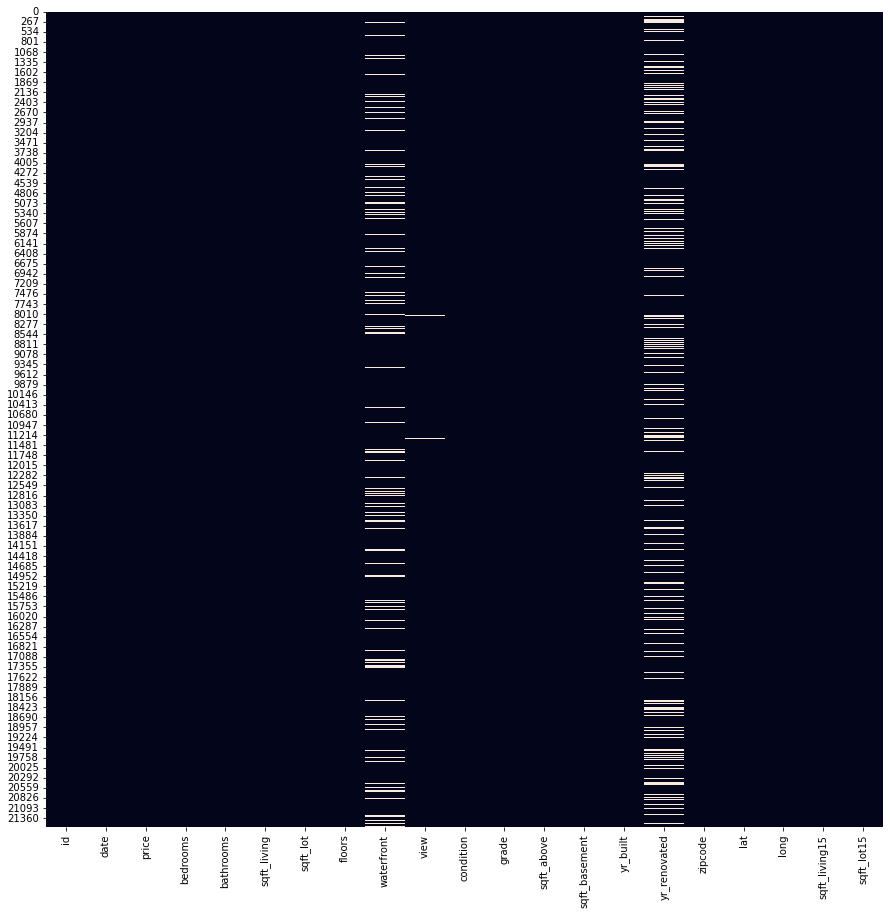

In [236]:
# Visualizing the null values
plt.figure(figsize=(15, 15))
sns.heatmap(houses_df.isnull(), cbar=False);

### observations
* "waterfront", "view" and "yr_renovated" contains null values. The percentage of missing value in this columns are 0.110015,0.002917 and 0.177895 respectively.

### Data cleaning
Since the percentage of the null per column in our dataset is low i opted to drop all the null values in the dataset.

    1.Dropping columns that will not be used
    2.Dealing with the null values

In [237]:
# filling view column with "missing"
houses_df['view'].fillna('Missing', inplace=True)

In [238]:
# Dropping null values in the datase
houses_df.dropna(inplace = True)

In [239]:
# # Dropping columns that will not be used in the study
houses_df.drop(["yr_renovated","sqft_above","sqft_basement",
               "zipcode","sqft_lot15","sqft_living15","date","long","lat","view","id"],
               axis=1,inplace = True)

In [244]:
#Checking for duplicate value
row,col = houses_df.shape
houses_df.drop_duplicates(inplace=True)

if houses_df.shape==(row,col):
    print('The dataset doesn\'t have any duplicates')
else:
    print('The dataset have duplicates')

The dataset doesn't have any duplicates


#### Observation
* The dataset has no duplicated values

#### b) Bivariate

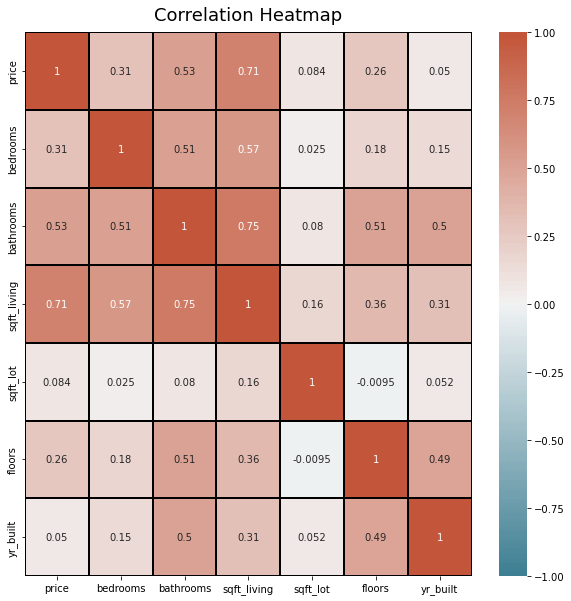

In [245]:
# plotting a heatmap
# It shows the correlation between different column pairs
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220,20,n=200)
heatmap = sns.heatmap(
    houses_df.corr(),vmin=-1, vmax=1,center = 0,
    annot=True,cmap=cmap,linewidths=2, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Exploring 'price' column
1. Generate a heatmap to explore the price column
2. Compute the correlation coefficient for price column with other columns
3. Since 'price' column is our dependent variable i will analyse to see it relates with the independent variables


In [246]:
#descriptive statistics summary
summary_statistics = houses_df.price.describe()
print("count:",summary_statistics[0])
print("Mean of the price:",summary_statistics[1])
print("Standard deviation of mean:",summary_statistics[2])
print("Minimum value for price:",summary_statistics[3])
print("Lower quantile for mprice:",summary_statistics[4])
print("median for price:",summary_statistics[5])
print("Upper quantile for the price:",summary_statistics[6])
print("Maximum value for the price:",summary_statistics[7])

count: 15804.0
Mean of the price: 541573.8255504936
Standard deviation of mean: 373976.806398149
Minimum value for price: 82000.0
Lower quantile for mprice: 321000.0
median for price: 450000.0
Upper quantile for the price: 645000.0
Maximum value for the price: 7700000.0


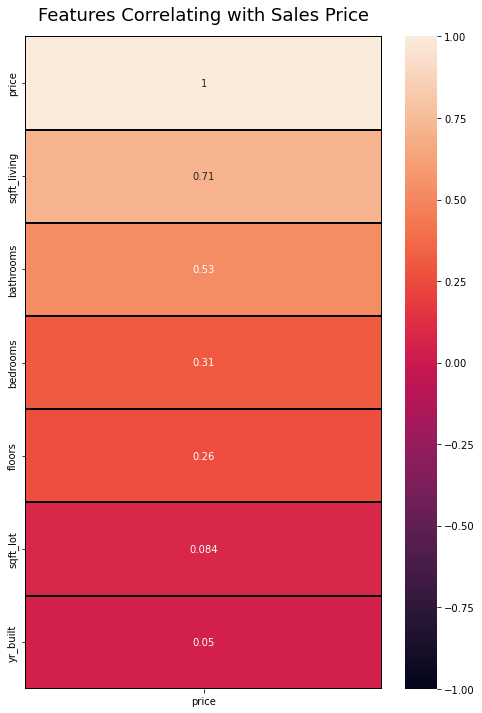

In [247]:
# plotting a heat map
# to show the correlation of price column with the independent variables 
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(
    houses_df.corr()[['price']].sort_values(by='price',ascending=False),
    vmin=-1, vmax=1, annot=True,linewidths=2, linecolor='black')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

### Observations
There is a high correlation between sqft_living and bathroom with the price column

In [248]:
# function for checking for outliers
def outlier(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers
# Checking the number of outliers in the 'price' column
print("Count of outliers:",outlier(houses_df.price).count())

Count of outliers: 835


In [249]:
#skewness and kurtosis
print("Skewness:",round(houses_df['price'].skew(),3))
print("Kurtosis:",round(houses_df['price'].kurt(),3))

Skewness: 4.287
Kurtosis: 38.865


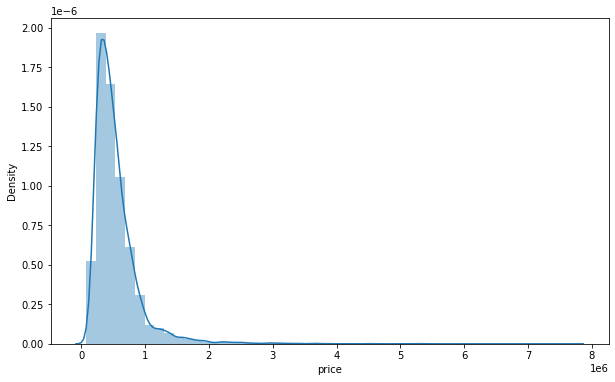

In [250]:
# Checking the distribution of price column
# sns.distplot(np.log(houses_df["price"]));
plt.figure(figsize=(10, 6))
sns.distplot(houses_df["price"]);

### Observations Of The Distribution Plot Of 'price' Column
1. Our plot shows that our data is not normally distributed.
2. Our plot shows that the price column displaces a Leptokurtic kurtosis
3. Our plot shows that the price column is Highly positively skewed


## Linear regression assumptions
### a) Linearity
#### Relationship of 'price' column with numerical variables

In [251]:
# to show the most correlated columns with price columns
PriceCorr = houses_df.corr()['price']
filteredcorr = PriceCorr[((PriceCorr >= .5) | (PriceCorr <= -.5)) & (PriceCorr !=1.000)].sort_values(ascending = False)
filteredcorr

sqft_living    0.706537
bathrooms      0.527319
Name: price, dtype: float64

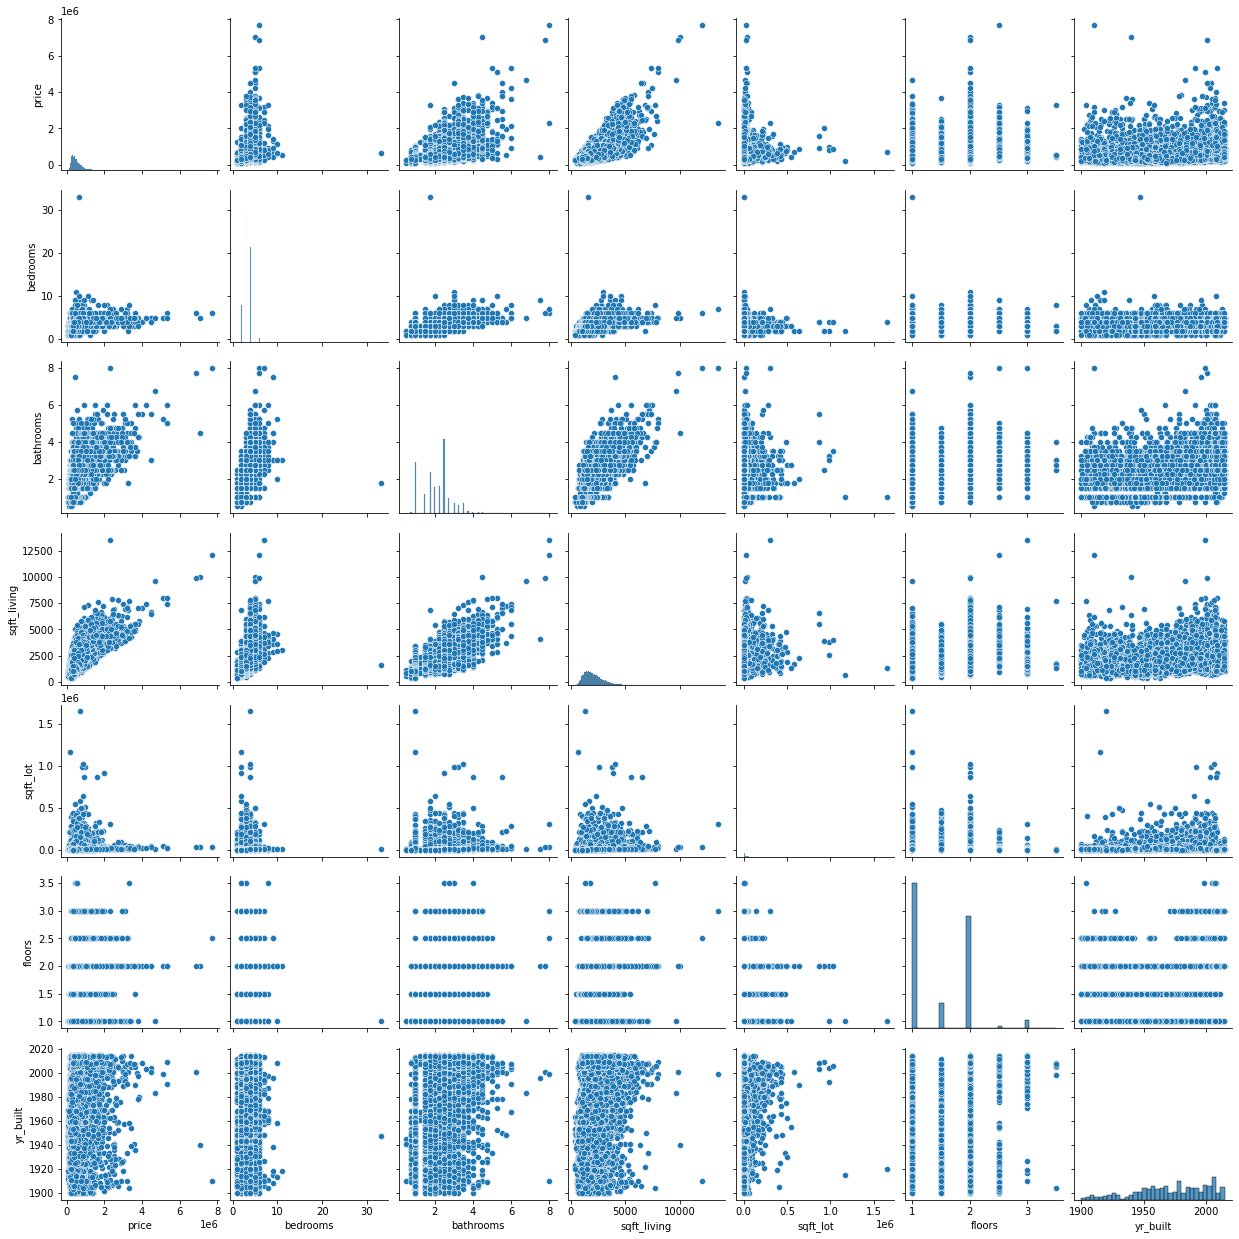

In [120]:
# Pairplot to show linearity
sns.pairplot(houses_df);

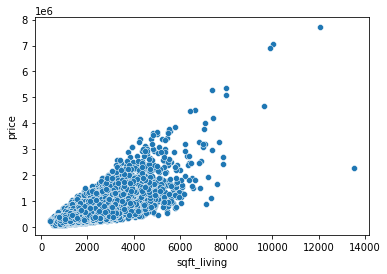

In [121]:
# A scatter plot between prie and sqft_living 
living = houses_df["sqft_living"]
price = houses_df["price"]
sns.scatterplot(data = houses_df,x = living,y = price);

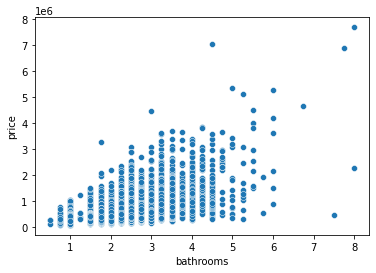

In [122]:
# A scatter plot between prie and bathrooms
bathrooms = houses_df["bathrooms"]
price = houses_df["price"]
sns.scatterplot(data = houses_df,x = bathrooms,y = price);

### Observations
* 'sqft_living' and 'bathrooms' seem to be linearly related with 'price' column. This relationships are positive which means that as one variable increases the other increases.

#### Relationship of 'price' column with categorical variables

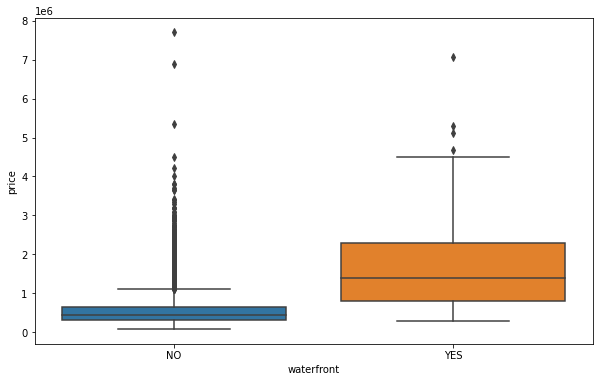

In [123]:
# Boxplot to show relationship between waterfront and prices
waterfront = houses_df.waterfront
data = pd.concat([houses_df['price'], houses_df["waterfront"]], axis=1)
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x=waterfront,y=price,data=data);

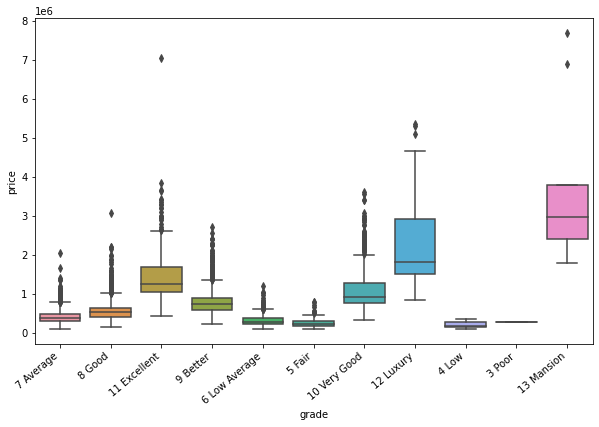

In [124]:
# Boxplot to show relationship between grade and prices
grade = houses_df.grade
data = pd.concat([houses_df['price'], houses_df["grade"]], axis=1)
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x=grade,y=price,data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

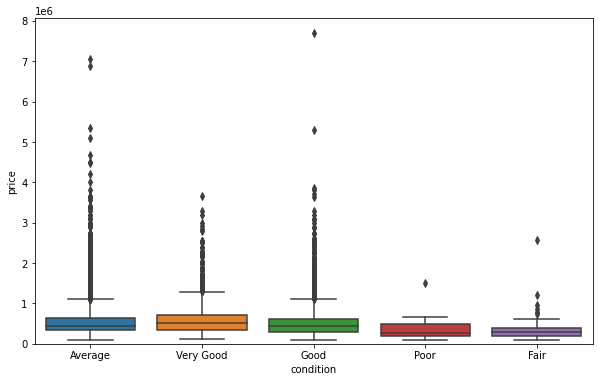

In [125]:
# Boxplot to show relationship between condition and prices
condition = houses_df.condition
data = pd.concat([houses_df['price'], houses_df["condition"]], axis=1)
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x=condition,y=price,data=data)
fig.axis(ymin=0);
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

### Observations
* 'waterfront' and "price seems to be related because the houses that have a waterfront have higher prices.
* The relationship seems to be stronger in the case of 'condition' where the box plot shows how prices decrease with the condition of the house.
* 'grade' and 'price' are not related.

### b) Normality
Density plots to show the distributions of values in different columns

Skewness: 4.287
Kurtosis: 38.865


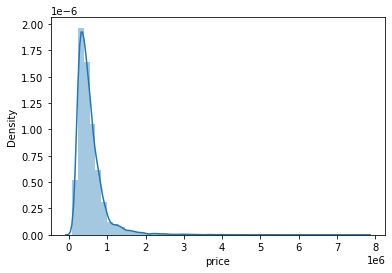

In [126]:
#skewness and kurtosis
print("Skewness:",round(houses_df['price'].skew(),3))
print("Kurtosis:",round(houses_df['price'].kurt(),3))

# Distribution of prices
sns.distplot(houses_df['price']); # Density plot

Skewness: 1.505
Kurtosis: 5.764


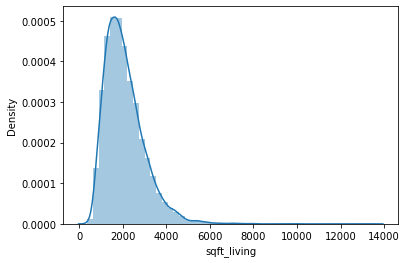

In [127]:
#skewness and kurtosis
print("Skewness:",round(houses_df['sqft_living'].skew(),3))
print("Kurtosis:",round(houses_df['sqft_living'].kurt(),3))

# Distribution of sqft_living
sns.distplot(houses_df['sqft_living']);  # Density plot

Skewness: 0.524
Kurtosis: 1.367


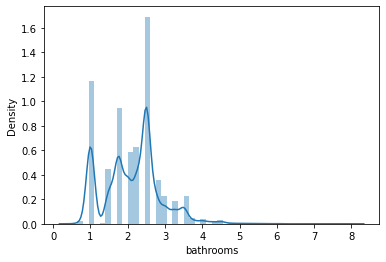

In [128]:
#skewness and kurtosis
print("Skewness:",round(houses_df['bathrooms'].skew(),3))
print("Kurtosis:",round(houses_df['bathrooms'].kurt(),3))

# Distribution of bathrooms
sns.distplot(houses_df['bathrooms']); # Density plot

## Simple linear regression Model
For our  model, we are going to take Square footage of living space in the home as the independent variable and price as the dependent variable.

#### Determining the x and y variables

In [129]:
# independent variable

X_baseline = houses_df['sqft_living']

# dependent variable

y = houses_df['price']

#### Creating the model

In [130]:
# Creating a simple linear regression model

model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))  # Ordinary Least Squares 

results = model.fit()   # Fitting the model

In [131]:
# model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.575e+04
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:50:41   Log-Likelihood:            -2.1976e+05
No. Observations:               15804   AIC:                         4.395e+05
Df Residuals:                   15802   BIC:                         4.395e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.754e+04   5217.330    -11.030      0.000   -6.78e+04   -4.73e+04
sqft_living   287.3399      2.289    125.504      0.000     282.852     291.828
==============================================================================
Omnibus:                    11314.260   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           481039.886
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      29.372   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
results.params

const         -57544.943355
sqft_living      287.339859
dtype: float64

### Interpreting the model

Our model smmary tells us that:

1. The model is statistically significant having F-statistic p-value below the alpha,given that the alpha is 0.05.

2. The model coefficients (`const` and `sqft_living`) are both statistically significant having t-statistic p-values below the alpha,given that the alpha is 0.05.

3. The model explains about 50% of the variance in price.

4. If a house's sqft_living is at 0 , we would expect a decrese in the price by about about 55168.993208 .

5. An increase of 1 in sqft_living is associated with an increase of about 286.150202 in price.

           Our regression line is:

$$ \hat{price} =  -55168.993208 + 286.150202 \ sqft\_living $$


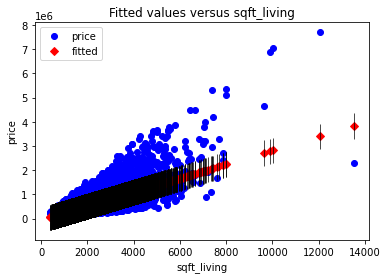

In [133]:
# Visualizing our model
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

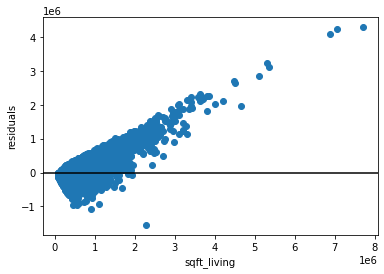

In [134]:
# visualizing the distribution of the residuals
fig, ax = plt.subplots()
ax.scatter(houses_df["price"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

## Multiple linear regression

#### Determining the dependent and independent variables

In [151]:
# independent variable
fx = houses_df[[ 'sqft_living', 'bedrooms', "bathrooms","sqft_lot","grade","floors", "waterfront", "condition", "yr_built" ]]
# dependent variable
fy = houses_df['price']

fx_var = pd.get_dummies(fx,drop_first=True)

#### Splitting data

In [152]:
X_train, X_test, y_train, y_test = train_test_split(fx_var, fy ,test_size = 0.2,random_state = 0)

In [153]:
# Reshaping y_train data
y_train_shape = y_train.values.reshape(-1,1)

In [154]:
# Reshaping y_test data
y_test_shape = y_test.values.reshape(-1,1)

#### Rechecking the shape of the data

In [155]:
X_train.shape

(12643, 21)

In [156]:
X_test.shape

(3161, 21)

In [157]:
y_train_shape.shape

(12643, 1)

In [158]:
y_test_shape.shape

(3161, 1)

### First multiple linear regression model

In [176]:
lr5_x =  sm.add_constant(X_train[['sqft_living',"bathrooms","bedrooms","floors",
                                  "sqft_lot","yr_built"]])
lr5 = sm.OLS(endog = y_train_shape,exog =lr5_x).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2744.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:09:26   Log-Likelihood:            -1.7500e+05
No. Observations:               12643   AIC:                         3.500e+05
Df Residuals:                   12636   BIC:                         3.501e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.669e+06   1.79e+05     37.342      0.000    6.32e+06    7.02e+06
sqft_living   314.8275      3.957     79.571      0.000     307.072     322.583
bathrooms    6.436e+04   5095.020     12.631      0.000    5.44e+04    7.43e+04
bedrooms    -6.959e+04   2913.979    -23.881      0.000   -7.53e+04   -6.39e+04
floors       5.119e+04   5062.074     10.112      0.000    4.13e+04    6.11e+04
sqft_lot       -0.2905      0.053     -5.524      0.000      -0.394      -0.187
yr_built    -3427.4758     92.751    -36.954      0.000   -3609.281   -3245.670
==============================================================================
Omnibus:                     9153.454   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           445546.051
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      31.474   Cond. No.                     3.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### second multiple linear regression model

For this model, we are going to use log tranformed('sqft_living'), 'bedrooms', "bathrooms", "sqft_lot", "floors", "waterfront", "condition", "grade", "yr_built" as the independent variable and price as the dependent variable

In [161]:
x_log = X_train.copy()
x_log["log(sqft_living)"] = np.log(x_log["sqft_living"])
x_log.drop(x_log.columns[[0]], axis=1,inplace = True)
#x_log = x_log[["log(sqft_living)",x_log]]
x_log.head(1)

,bedrooms,bathrooms,sqft_lot,floors,yr_built,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,...,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,log(sqft_living)
17440,3,2.25,6449,1.0,1986,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,7.396335


In [162]:
lr2 = sm.OLS(endog = y_train_shape,exog = sm.add_constant(x_log)).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1165.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:06:23   Log-Likelihood:            -1.7346e+05
No. Observations:               12643   AIC:                         3.470e+05
Df Residuals:                   12621   BIC:                         3.471e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.634e+06   1.93e+05     34.384      0.000    6.26e+06    7.01e+06
bedrooms            -1.632e+04   2740.084     -5.955      0.000   -2.17e+04   -1.09e+04
bathrooms            8.321e+04   4544.250     18.311      0.000    7.43e+04    9.21e+04
sqft_lot               -0.1500      0.047     -3.214      0.001      -0.242      -0.059
floors               2.396e+04   4658.885      5.143      0.000    1.48e+04    3.31e+04
yr_built            -3708.1498     89.379    -41.488      0.000   -3883.346   -3532.953
grade_11 Excellent   3.036e+05   1.67e+04     18.184      0.000    2.71e+05    3.36e+05
grade_12 Luxury      9.492e+05   3.04e+04     31.184      0.000     8.9e+05    1.01e+06
grade_13 Mansion     2.718e+06   7.88e+04     34.492      0.000    2.56e+06    2.87e+06
grade_3 Poor        -5.771e+05   2.21e+05     -2.614      0.009   -1.01e+06   -1.44e+05
grade_4 Low         -5.052e+05   7.17e+04     -7.045      0.000   -6.46e+05   -3.65e+05
grade_5 Fair        -6.205e+05   2.32e+04    -26.784      0.000   -6.66e+05   -5.75e+05
grade_6 Low Average -5.779e+05   1.39e+04    -41.613      0.000   -6.05e+05   -5.51e+05
grade_7 Average     -5.086e+05   1.09e+04    -46.697      0.000    -5.3e+05   -4.87e+05
grade_8 Good        -4.082e+05   9971.322    -40.939      0.000   -4.28e+05   -3.89e+05
grade_9 Better      -2.212e+05   1.03e+04    -21.500      0.000   -2.41e+05   -2.01e+05
waterfront_YES       8.194e+05   2.36e+04     34.751      0.000    7.73e+05    8.66e+05
condition_Fair      -3.036e+04   2.24e+04     -1.354      0.176   -7.43e+04    1.36e+04
condition_Good       1.135e+04   4869.890      2.330      0.020    1802.136    2.09e+04
condition_Poor      -6.211e+04   5.57e+04     -1.116      0.265   -1.71e+05     4.7e+04
condition_Very Good  5.396e+04   7833.202      6.889      0.000    3.86e+04    6.93e+04
log(sqft_living)     1.923e+05   9484.200     20.280      0.000    1.74e+05    2.11e+05
==============================================================================
Omnibus:                     8529.859   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           504942.448
Skew:                           2.583   Prob(JB):                         0.00
Kurtosis:                      33.526   Cond. No.                     5.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
xlog_pred = lr2.predict(sm.add_constant(X_test))
print(f"Mean absolute error: {np.round(mean_absolute_error(y_test, xlog_pred), 4)}")
print(f"Root mean squared error: {np.round(np.sqrt(mean_squared_error(y_test,xlog_pred )), 4)}")
print(f"Adjusted r_squarde: {lr2.rsquared_adj}")

Mean absolute error: 924544883.2999
Root mean squared error: 1286844161.5353
Adjusted r_squarde: 0.6591886416069341


### Third multiple linear regression model

For this model, we are going to use log tranformed('sqft_living'), 'bedrooms', "bathrooms", "sqft_lot", "floors", "waterfront", "condition", "grade", "yr_built" as the independent variable and log transformed price as the dependent variable

In [166]:
ylog_price = np.log(y_train_shape)
x = X_train.copy()

In [167]:
lr3 = sm.OLS(endog =ylog_price ,exog = sm.add_constant(x)).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1099.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:08:13   Log-Likelihood:                -3252.8
No. Observations:               12643   AIC:                             6550.
Df Residuals:                   12621   BIC:                             6713.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.6975      0.251     98.460      0.000      24.206      25.189
sqft_living             0.0002   6.47e-06     30.269      0.000       0.000       0.000
bedrooms               -0.0320      0.004     -8.360      0.000      -0.039      -0.024
bathrooms               0.0798      0.007     12.229      0.000       0.067       0.093
sqft_lot             1.919e-08   6.66e-08      0.288      0.773   -1.11e-07     1.5e-07
floors                  0.0698      0.007     10.512      0.000       0.057       0.083
yr_built               -0.0060      0.000    -46.646      0.000      -0.006      -0.006
grade_11 Excellent      0.0950      0.024      3.943      0.000       0.048       0.142
grade_12 Luxury         0.2056      0.044      4.649      0.000       0.119       0.292
grade_13 Mansion        0.3492      0.113      3.077      0.002       0.127       0.572
grade_3 Poor           -1.0721      0.314     -3.414      0.001      -1.688      -0.457
grade_4 Low            -1.1401      0.101    -11.235      0.000      -1.339      -0.941
grade_5 Fair           -1.1311      0.033    -34.679      0.000      -1.195      -1.067
grade_6 Low Average    -0.9112      0.020    -45.875      0.000      -0.950      -0.872
grade_7 Average        -0.6345      0.016    -39.044      0.000      -0.666      -0.603
grade_8 Good           -0.3971      0.015    -26.650      0.000      -0.426      -0.368
grade_9 Better         -0.1537      0.015    -10.347      0.000      -0.183      -0.125
waterfront_YES          0.5333      0.034     15.860      0.000       0.467       0.599
condition_Fair         -0.1663      0.032     -5.210      0.000      -0.229      -0.104
condition_Good          0.0070      0.007      1.011      0.312      -0.007       0.021
condition_Poor         -0.0622      0.079     -0.785      0.433      -0.218       0.093
condition_Very Good     0.0878      0.011      7.875      0.000       0.066       0.110
==============================================================================
Omnibus:                       65.896   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.402
Skew:                          -0.121   Prob(JB):                     2.57e-17
Kurtosis:                       3.295   Cond. No.                     5.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
ylog_pred = lr3.predict(sm.add_constant(X_test))
print(f"Mean absolute error: {np.round(mean_absolute_error(y_test, ylog_pred), 4)}")
print(f"Root mean squared error: {np.round(np.sqrt(mean_squared_error(y_test,ylog_pred )), 4)}")
print(f"Adjusted r_squarde: {lr3.rsquared_adj}")

Mean absolute error: 534791.5525
Root mean squared error: 645896.4915
Adjusted r_squarde: 0.6458506316240668


### Fourth multiple linear regression model

For this model, we are going to use log tranformed 'sqft_living', 'bedrooms', "bathrooms", "sqft_lot", "floors" as the independent variable and log transformed price as the dependent variable

In [169]:
xlog = X_train.copy()
xlog["log(sqft_living)"] = np.log(xlog["sqft_living"])
xlog["log(bedrooms)"] = np.log(xlog["bedrooms"])
xlog["log(bathrooms)"] = np.log(xlog["bathrooms"])
xlog["log(sqft_lot)"] = np.log(xlog["sqft_lot"])
xlog["log(floors)"] = np.log(xlog["floors"])
xlog.drop(xlog.columns[[0,1,2,3,4]], axis=1,inplace = True)
xlog.head(1)

,yr_built,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,...,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,log(sqft_living),log(bedrooms),log(bathrooms),log(sqft_lot),log(floors)
17440,1986,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,7.396335,1.098612,0.81093,8.77168,0.0


In [170]:
ylog_price = np.log(y_train_shape)

In [171]:
lr4 = sm.OLS(endog =ylog_price ,exog = sm.add_constant(xlog)).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1104.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:10:57   Log-Likelihood:                -3234.5
No. Observations:               12643   AIC:                             6513.
Df Residuals:                   12621   BIC:                             6677.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.8656      0.285     76.734      0.000      21.307      22.424
yr_built               -0.0058      0.000    -44.964      0.000      -0.006      -0.006
grade_11 Excellent      0.2027      0.024      8.551      0.000       0.156       0.249
grade_12 Luxury         0.4731      0.043     10.964      0.000       0.389       0.558
grade_13 Mansion        0.9240      0.112      8.283      0.000       0.705       1.143
grade_3 Poor           -0.8946      0.314     -2.850      0.004      -1.510      -0.279
grade_4 Low            -0.9931      0.102     -9.737      0.000      -1.193      -0.793
grade_5 Fair           -1.0947      0.033    -33.291      0.000      -1.159      -1.030
grade_6 Low Average    -0.9322      0.020    -47.278      0.000      -0.971      -0.894
grade_7 Average        -0.7128      0.016    -45.908      0.000      -0.743      -0.682
grade_8 Good           -0.4866      0.014    -34.120      0.000      -0.515      -0.459
grade_9 Better         -0.2128      0.015    -14.549      0.000      -0.242      -0.184
waterfront_YES          0.5812      0.034     17.311      0.000       0.515       0.647
condition_Fair         -0.1355      0.032     -4.250      0.000      -0.198      -0.073
condition_Good          0.0100      0.007      1.431      0.152      -0.004       0.024
condition_Poor         -0.0648      0.079     -0.818      0.413      -0.220       0.090
condition_Very Good     0.0825      0.011      7.385      0.000       0.061       0.104
log(sqft_living)        0.4821      0.015     32.874      0.000       0.453       0.511
log(bedrooms)          -0.1570      0.013    -11.670      0.000      -0.183      -0.131
log(bathrooms)          0.1229      0.013      9.452      0.000       0.097       0.148
log(sqft_lot)          -0.0457      0.004    -12.581      0.000      -0.053      -0.039
log(floors)             0.0537      0.011      5.044      0.000       0.033       0.075
==============================================================================
Omnibus:                       36.860   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.529
Skew:                          -0.076   Prob(JB):                     5.82e-10
Kurtosis:                       3.239   Cond. No.                     2.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [172]:
logpred = lr4.predict(sm.add_constant(X_test))
print(f"Mean absolute error: {np.round(mean_absolute_error(y_test, logpred), 4)}")
print(f"Root mean squared error: {np.round(np.sqrt(mean_squared_error(y_test, logpred)), 4)}")
print(f"Adjusted r_squarde: {lr4.rsquared_adj}")

Mean absolute error: 523117.7949
Root mean squared error: 635382.9445
Adjusted r_squarde: 0.6468753105964149


### Fifth multiple linear regression model

For this model, we are going to 'sqft_living', 'bedrooms', "bathrooms", "sqft_lot", "floors", "waterfront", "condition", "grade", "yr_built"
as the independent variable and price as the dependent variable

In [177]:
# Fit the resgression line using 'OLS'
sm.add_constant(X_train)
lr1 = sm.OLS(endog = y_train_shape, exog =sm.add_constant(X_train)).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1277.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:10:28   Log-Likelihood:            -1.7307e+05
No. Observations:               12643   AIC:                         3.462e+05
Df Residuals:                   12621   BIC:                         3.463e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.367e+06   1.71e+05     43.119      0.000    7.03e+06     7.7e+06
sqft_living           154.9773      4.409     35.149      0.000     146.335     163.620
bedrooms            -2.836e+04   2605.391    -10.884      0.000   -3.35e+04   -2.33e+04
bathrooms            5.322e+04   4444.522     11.974      0.000    4.45e+04    6.19e+04
sqft_lot               -0.2543      0.045     -5.606      0.000      -0.343      -0.165
floors               2.772e+04   4519.426      6.134      0.000    1.89e+04    3.66e+04
yr_built            -3495.9782     86.980    -40.193      0.000   -3666.473   -3325.483
grade_11 Excellent   2.223e+05   1.64e+04     13.537      0.000     1.9e+05    2.54e+05
grade_12 Luxury      7.638e+05   3.01e+04     25.361      0.000    7.05e+05    8.23e+05
grade_13 Mansion     2.327e+06   7.73e+04     30.108      0.000    2.18e+06    2.48e+06
grade_3 Poor        -5.653e+05   2.14e+05     -2.643      0.008   -9.85e+05   -1.46e+05
grade_4 Low         -4.838e+05   6.91e+04     -7.000      0.000   -6.19e+05   -3.48e+05
grade_5 Fair        -5.426e+05   2.22e+04    -24.425      0.000   -5.86e+05   -4.99e+05
grade_6 Low Average  -4.88e+05   1.35e+04    -36.073      0.000   -5.15e+05   -4.62e+05
grade_7 Average     -4.085e+05   1.11e+04    -36.908      0.000    -4.3e+05   -3.87e+05
grade_8 Good        -3.203e+05   1.02e+04    -31.554      0.000    -3.4e+05      -3e+05
grade_9 Better      -1.737e+05   1.01e+04    -17.162      0.000   -1.94e+05   -1.54e+05
waterfront_YES       7.825e+05   2.29e+04     34.164      0.000    7.38e+05    8.27e+05
condition_Fair      -3.007e+04   2.17e+04     -1.383      0.167   -7.27e+04    1.25e+04
condition_Good       1.054e+04   4719.968      2.233      0.026    1286.772    1.98e+04
condition_Poor      -5.612e+04    5.4e+04     -1.040      0.299   -1.62e+05    4.97e+04
condition_Very Good  5.599e+04   7595.217      7.372      0.000    4.11e+04    7.09e+04
==============================================================================
Omnibus:                     7345.699   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           285695.843
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                      25.880   Cond. No.                     5.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Evaluate the performance
* Mean absolute error 
* Mean Square Error
* Root mean Squared Error

In [178]:
y_pred = lr_one.predict(sm.add_constant(X_test))
print(f"Mean absolute error: {np.round(mean_absolute_error(y_test, y_pred), 4)}")
print(f"Root mean squared error: {np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)}")
print(f"Adjusted r_squarde: {lr_one.rsquared_adj}")

Mean absolute error: 137968.1643
Root mean squared error: 211817.5735
Adjusted r_squarde: 0.6794590684020307


#### Interpreting the Mean absolute error and root mean squared error

It means that our model is off by about  137968.1643 USD in a given prediction.

#### Interpreting the root mean squared error

It means that our model is off by about 211817.5735 USD in a given prediction.

#### Interpreting the Adjusted r_squarded

The model explains about 68% of the variance in price.